# Working with networks and graphs

This tutorial has some bits and pieces taken from [here](https://networkx.github.io/documentation/stable/tutorial.html).

The package we will use for our network analysis is `networkx`.

In [137]:
import networkx as nx
import matplotlib.pyplot as plt

Let's create a graph!

In [138]:
G = nx.Graph()

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

## Nodes

The graph **G** can be grown in several ways. `NetworkX` includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [139]:
G.add_node(1)

has added one node but we can also add several at the same time via

In [140]:
G.add_nodes_from([2, 3])

## Edges

`G` can also be grown by adding one edge at a time or several at the same time

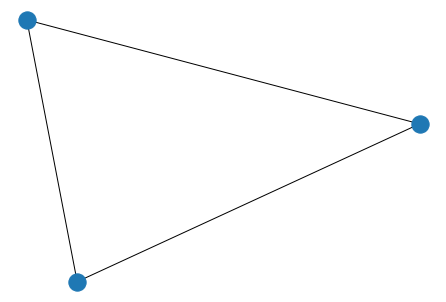

In [141]:
G.add_edges_from([(1, 2), (1, 3),(2,3)])
nx.draw(G)

Let's start fresh

In [142]:
G.clear()

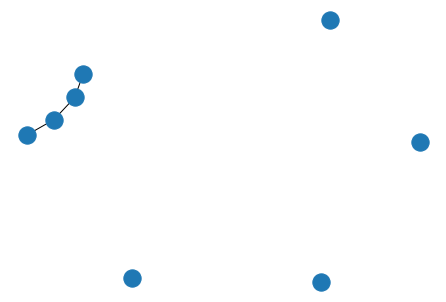

In [143]:
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'spam')
nx.draw(G)

where now we have

In [144]:
G.number_of_nodes()

8

In [145]:
G.number_of_edges()

3

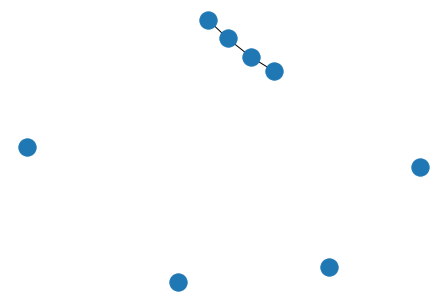

In [146]:
nx.draw(G)

We can examine the nodes and edges. Four basic graph properties facilitate reporting: `G.nodes`, `G.edges` `G.adj` and `G.degree`. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods `.items()`, `.data('spam')`. If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.

In [147]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [148]:
list(G.edges)
[(1, 2), (1, 3), (3, 'm')]

[(1, 2), (1, 3), (3, 'm')]

In [149]:
list(G.adj[2])

[1]

In [150]:
G.degree[3]

2

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()` and `Graph.remove_edges_from()`, e.g.

In [151]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)

[1, 3, 'spam']


In [152]:
G[1]

AtlasView({})

Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items(). Note that for undirected graphs, adjacency iteration sees each edge twice.

In [153]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < .5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [65]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [66]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


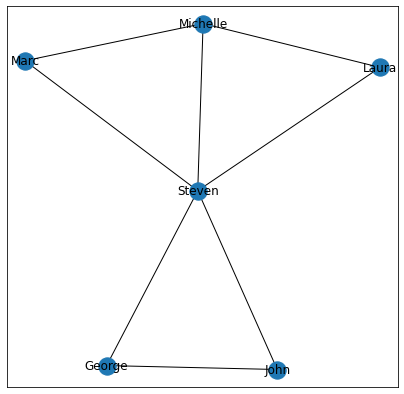

In [71]:
plt.figure(figsize=(7,7))
nx.draw_networkx(G_symmetric);

## Directed Graphs

In many applications it is natural to assume that the graph has directed edges. The DiGraph class provides additional properties specific to directed edges, e.g., `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()` etc. To allow algorithms to work with both classes easily, the directed versions of `neighbors()` is equivalent to `successors()` while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

In [87]:
DG = nx.DiGraph()

In [88]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3,1, 0.75)])

In [90]:
DG.out_degree(1, weight='weight')

0.5

In [93]:
DG.in_degree(3, weight='weight')

0

## Having fun with Networkx

`Networkx` provides a number of functions that generate famous graphs. We have already seen one example. Zachary’s karate club graph can be generated with a simple function call:

In [95]:
kn=nx.karate_club_graph()

We can visualize this famous graph using the already well-known `matplotlib` package

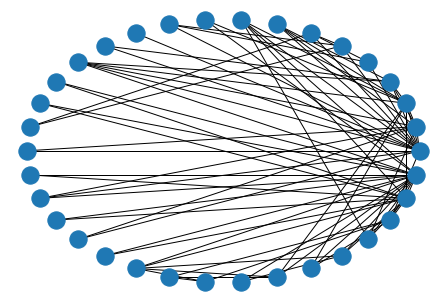

In [96]:
nx.draw_circular(kn)

We can use the module to generate a graph with a hexagonal structure such as is observed in graphene sheets or carbon nanotubes.

In [97]:
Ghex=nx.hexagonal_lattice_graph(10,10)

In [98]:
pos = nx.get_node_attributes(Ghex, 'pos')

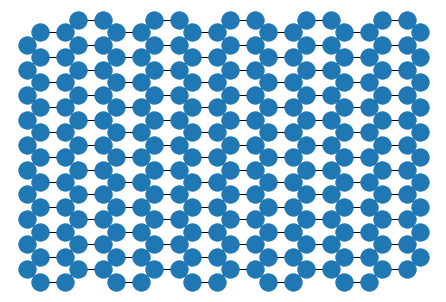

In [99]:
nx.draw(Ghex,pos)

## Social networks

Bits are taken from [here](https://www.kirenz.com/post/2019-08-13-network_analysis/).

It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters.

We can determine the clusters of a node, local clustering coefficient, which is the fraction of pairs of the node’s friends (that is connections) that are connected with each other.

To determine the local clustering coefficient, we make use of `nx.clustering(Graph, Node)` function.

In the symmetric employee-network, you will find that Michelle has a local clustering coefficient of 0.67 and Laura has a local clustering coefficient of 1.

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric employee-network is 0.867.


In [100]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

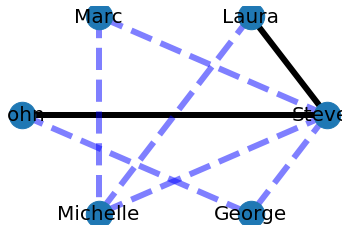

In [103]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

and here comes the analysis of the clustering coeffficients with more information on the computation of this given [here](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html)

In [104]:
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

It is also very common to analyze the **degrees of the graph nodes**

In [105]:
nx.degree(G_symmetric, 'Michelle')

3

In [106]:
nx.degree(G_symmetric, 'John')

2

or the shortest path

In [119]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

Another key measure for understanding the graph is the so-called **centrality**. We can use this to find the most important nodes (individuals) in the network. These parameters are called as centrality measures. Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

In [120]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node.

Eigenvector centrality is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes.

We can use the `eigenvector_centrality()` function of `NetworkX` to calculate eigenvector centrality of all the nodes in a network.

Google’s Pagerank algorithm is a type of eigenvector centrality algorithm.

In [121]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [122]:
L=nx.laplacian_matrix(G_symmetric)
print(L)

  (0, 0)	5
  (0, 1)	-1
  (0, 2)	-1
  (0, 3)	-1
  (0, 4)	-1
  (0, 5)	-1
  (1, 0)	-1
  (1, 1)	2
  (1, 4)	-1
  (2, 0)	-1
  (2, 2)	2
  (2, 4)	-1
  (3, 0)	-1
  (3, 3)	2
  (3, 5)	-1
  (4, 0)	-1
  (4, 1)	-1
  (4, 2)	-1
  (4, 4)	3
  (5, 0)	-1
  (5, 3)	-1
  (5, 5)	2


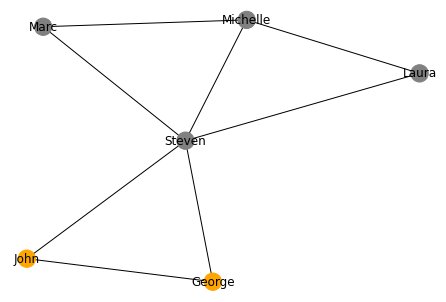

In [130]:
vf=nx.fiedler_vector(G_symmetric)
layout = nx.spring_layout(G_symmetric, pos=nx.circular_layout(G_symmetric))
colors = ['orange' if eigv > 0 else 'gray' for eigv in vf]
nx.draw(G_symmetric, pos=layout, with_labels=True, node_color=colors)
    


### A facebook example

This dataset consists of ‘circles’ (or ‘friends lists’) from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature “political=Democratic Party”, the new data would simply contain “political=anonymized feature 1”. Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.

**Source: J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012**

Let us start with the Facebook data, for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list. You can download the required facebook_combined.txt file from the Stanford University site.

We read in the file and construct the Graph

In [131]:
import pandas as pd

In [132]:
df = pd.read_csv('facebook_combined.txt')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [134]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [136]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


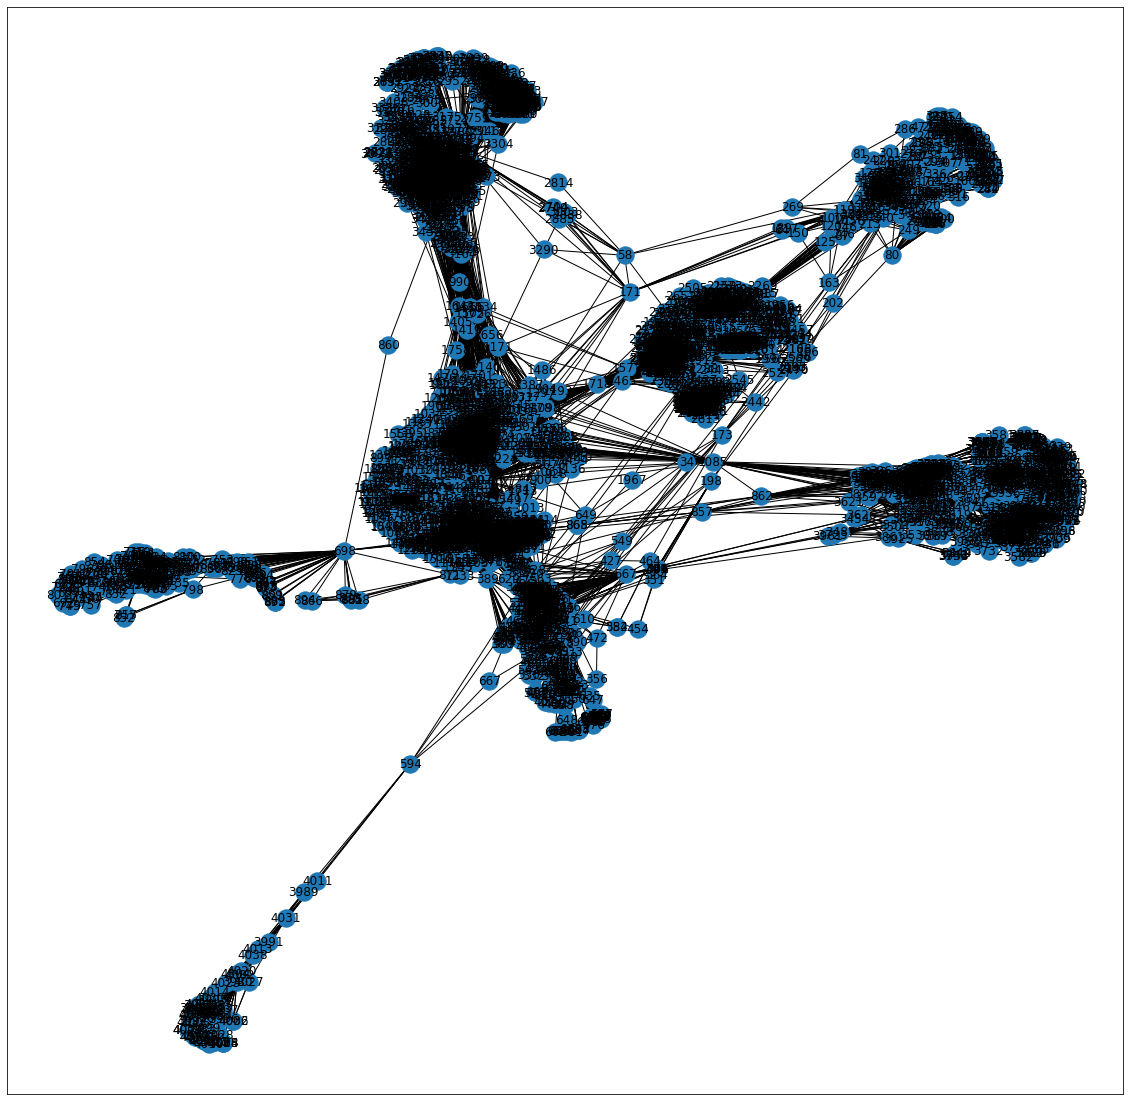

In [118]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality. The code to do this is:

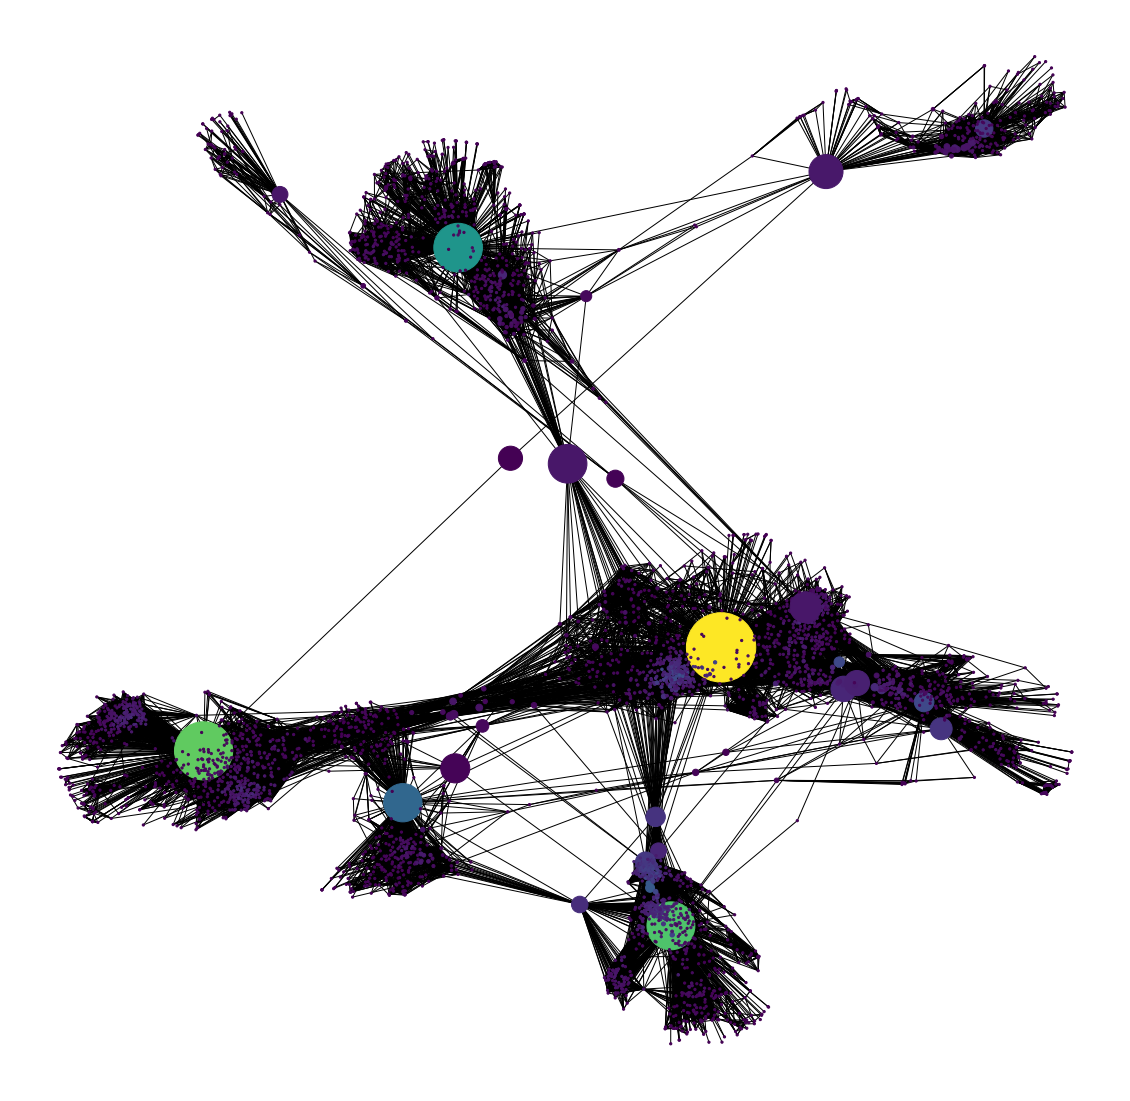

In [65]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');